In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the results from CSV files

# Get the scores/metrics for each model
df = pd.read_csv('../results/resultsV1.csv').drop('Unnamed: 0',axis=1)
# Get the training times for each model
time = pd.read_csv('../results/timeV1.csv')
# Rename columns for clarity
time.rename(columns={time.columns[0]: 'Model', time.columns[1]: 'Value'}, inplace=True)

In [11]:
# rename models in dataframes for cleanliness
time.loc[time['Model'] == 'roberta-base', 'Model'] = 'RoBERTa-base'
time.loc[time['Model'] == 'mobilebert', 'Model'] = 'MobileBERT'
time.loc[time['Model'] == 'alberta', 'Model'] = 'ALBERTA'
time.loc[time['Model'] == 'distilbert-base-uncased', 'Model'] = 'DistilBERT-base-uncased'

df.loc[df['Model'] == 'roberta-base', 'Model'] = 'RoBERTa-base'
df.loc[df['Model'] == 'mobilebert', 'Model'] = 'MobileBERT'
df.loc[df['Model'] == 'alberta', 'Model'] = 'ALBERTA'
df.loc[df['Model'] == 'distilbert-base-uncased', 'Model'] = 'DistilBERT-base-uncased'

In [12]:
# Convert 'Value' from minutes to hours and remaining minutes
time['hours'], time['minutes'] = divmod(time['Value'], 60)

# Convert 'hours' and 'minutes' to integer
time['hours'] = time['hours'].astype(int)
time['minutes'] = time['minutes'].astype(int)

# Create 'time_labels' column in HH:MM format
time['time_labels'] = time['hours'].astype(str).str.zfill(1) + ':' + time['minutes'].astype(str).str.zfill(2)


In [13]:
time

,Model,Value,hours,minutes,time_labels
0,MobileBERT,97.908879,1,37,1:37
1,ALBERTA,342.292872,5,42,5:42
2,RoBERTa-base,329.663762,5,29,5:29
3,DistilBERT-base-uncased,110.837758,1,50,1:50


In [14]:
# Convert time value to hours
time['Value'] = round(time['Value'] / 60,2)

In [15]:
time

,Model,Value,hours,minutes,time_labels
0,MobileBERT,1.63,1,37,1:37
1,ALBERTA,5.70,5,42,5:42
2,RoBERTa-base,5.49,5,29,5:29
3,DistilBERT-base-uncased,1.85,1,50,1:50


In [16]:
df

,Model,Learning Rate,Dropout Probability,Train Accuracy,Test Accuracy
0,MobileBERT,0.00001,0.1,0.46575,0.516
1,MobileBERT,0.00001,0.3,0.58375,0.572
2,MobileBERT,0.00001,0.5,0.72175,0.740
3,MobileBERT,0.00002,0.1,0.93525,0.920
4,MobileBERT,0.00002,0.3,0.92600,0.906
5,MobileBERT,0.00002,0.5,0.98125,0.942
6,MobileBERT,0.00003,0.1,0.99000,0.936
7,MobileBERT,0.00003,0.3,0.99550,0.932
8,MobileBERT,0.00003,0.5,0.99775,0.934
9,ALBERTA,0.00001,0.1,0.94325,0.952


                      Model  Learning Rate  Dropout Probability  \
9                   ALBERTA        0.00001                  0.1   
28  DistilBERT-base-uncased        0.00001                  0.3   
5                MobileBERT        0.00002                  0.5   
22             RoBERTa-base        0.00002                  0.3   

    Train Accuracy  Test Accuracy  
9          0.94325          0.952  
28         0.96450          0.946  
5          0.98125          0.942  
22         0.99375          0.956  


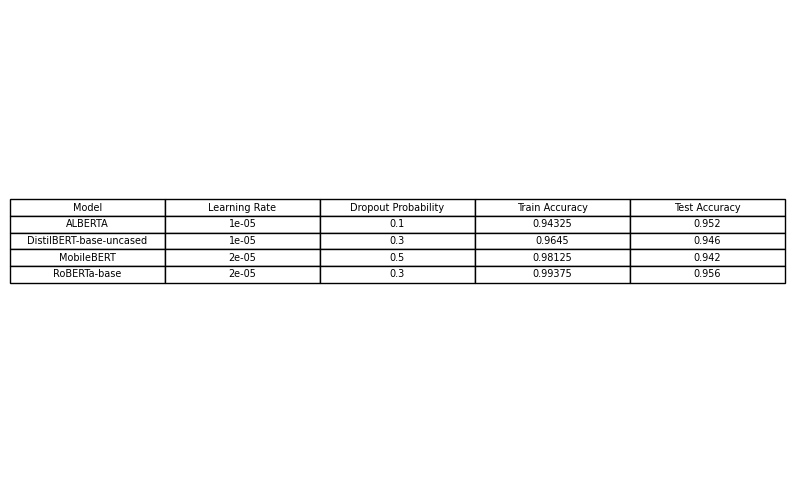

In [27]:

# Find the row with the maximum test accuracy for each model
max_test_acc_rows = df.groupby('Model')['Test Accuracy'].idxmax()

# Filter the original dataframe based on the indices of the rows with max test accuracy
result_df = df.loc[max_test_acc_rows]

# Display the result
print(result_df)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = [result_df.columns] + result_df.values.tolist()
ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Make the axes bold
for key, cell in ax.spines.items():
    cell.set_linewidth(20)

# Save the table as a PNG file
plt.savefig('../images/max_test_accuracy_table.png')

C:\Users\UKGC\AppData\Local\Temp\ipykernel_9012\2467500199.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


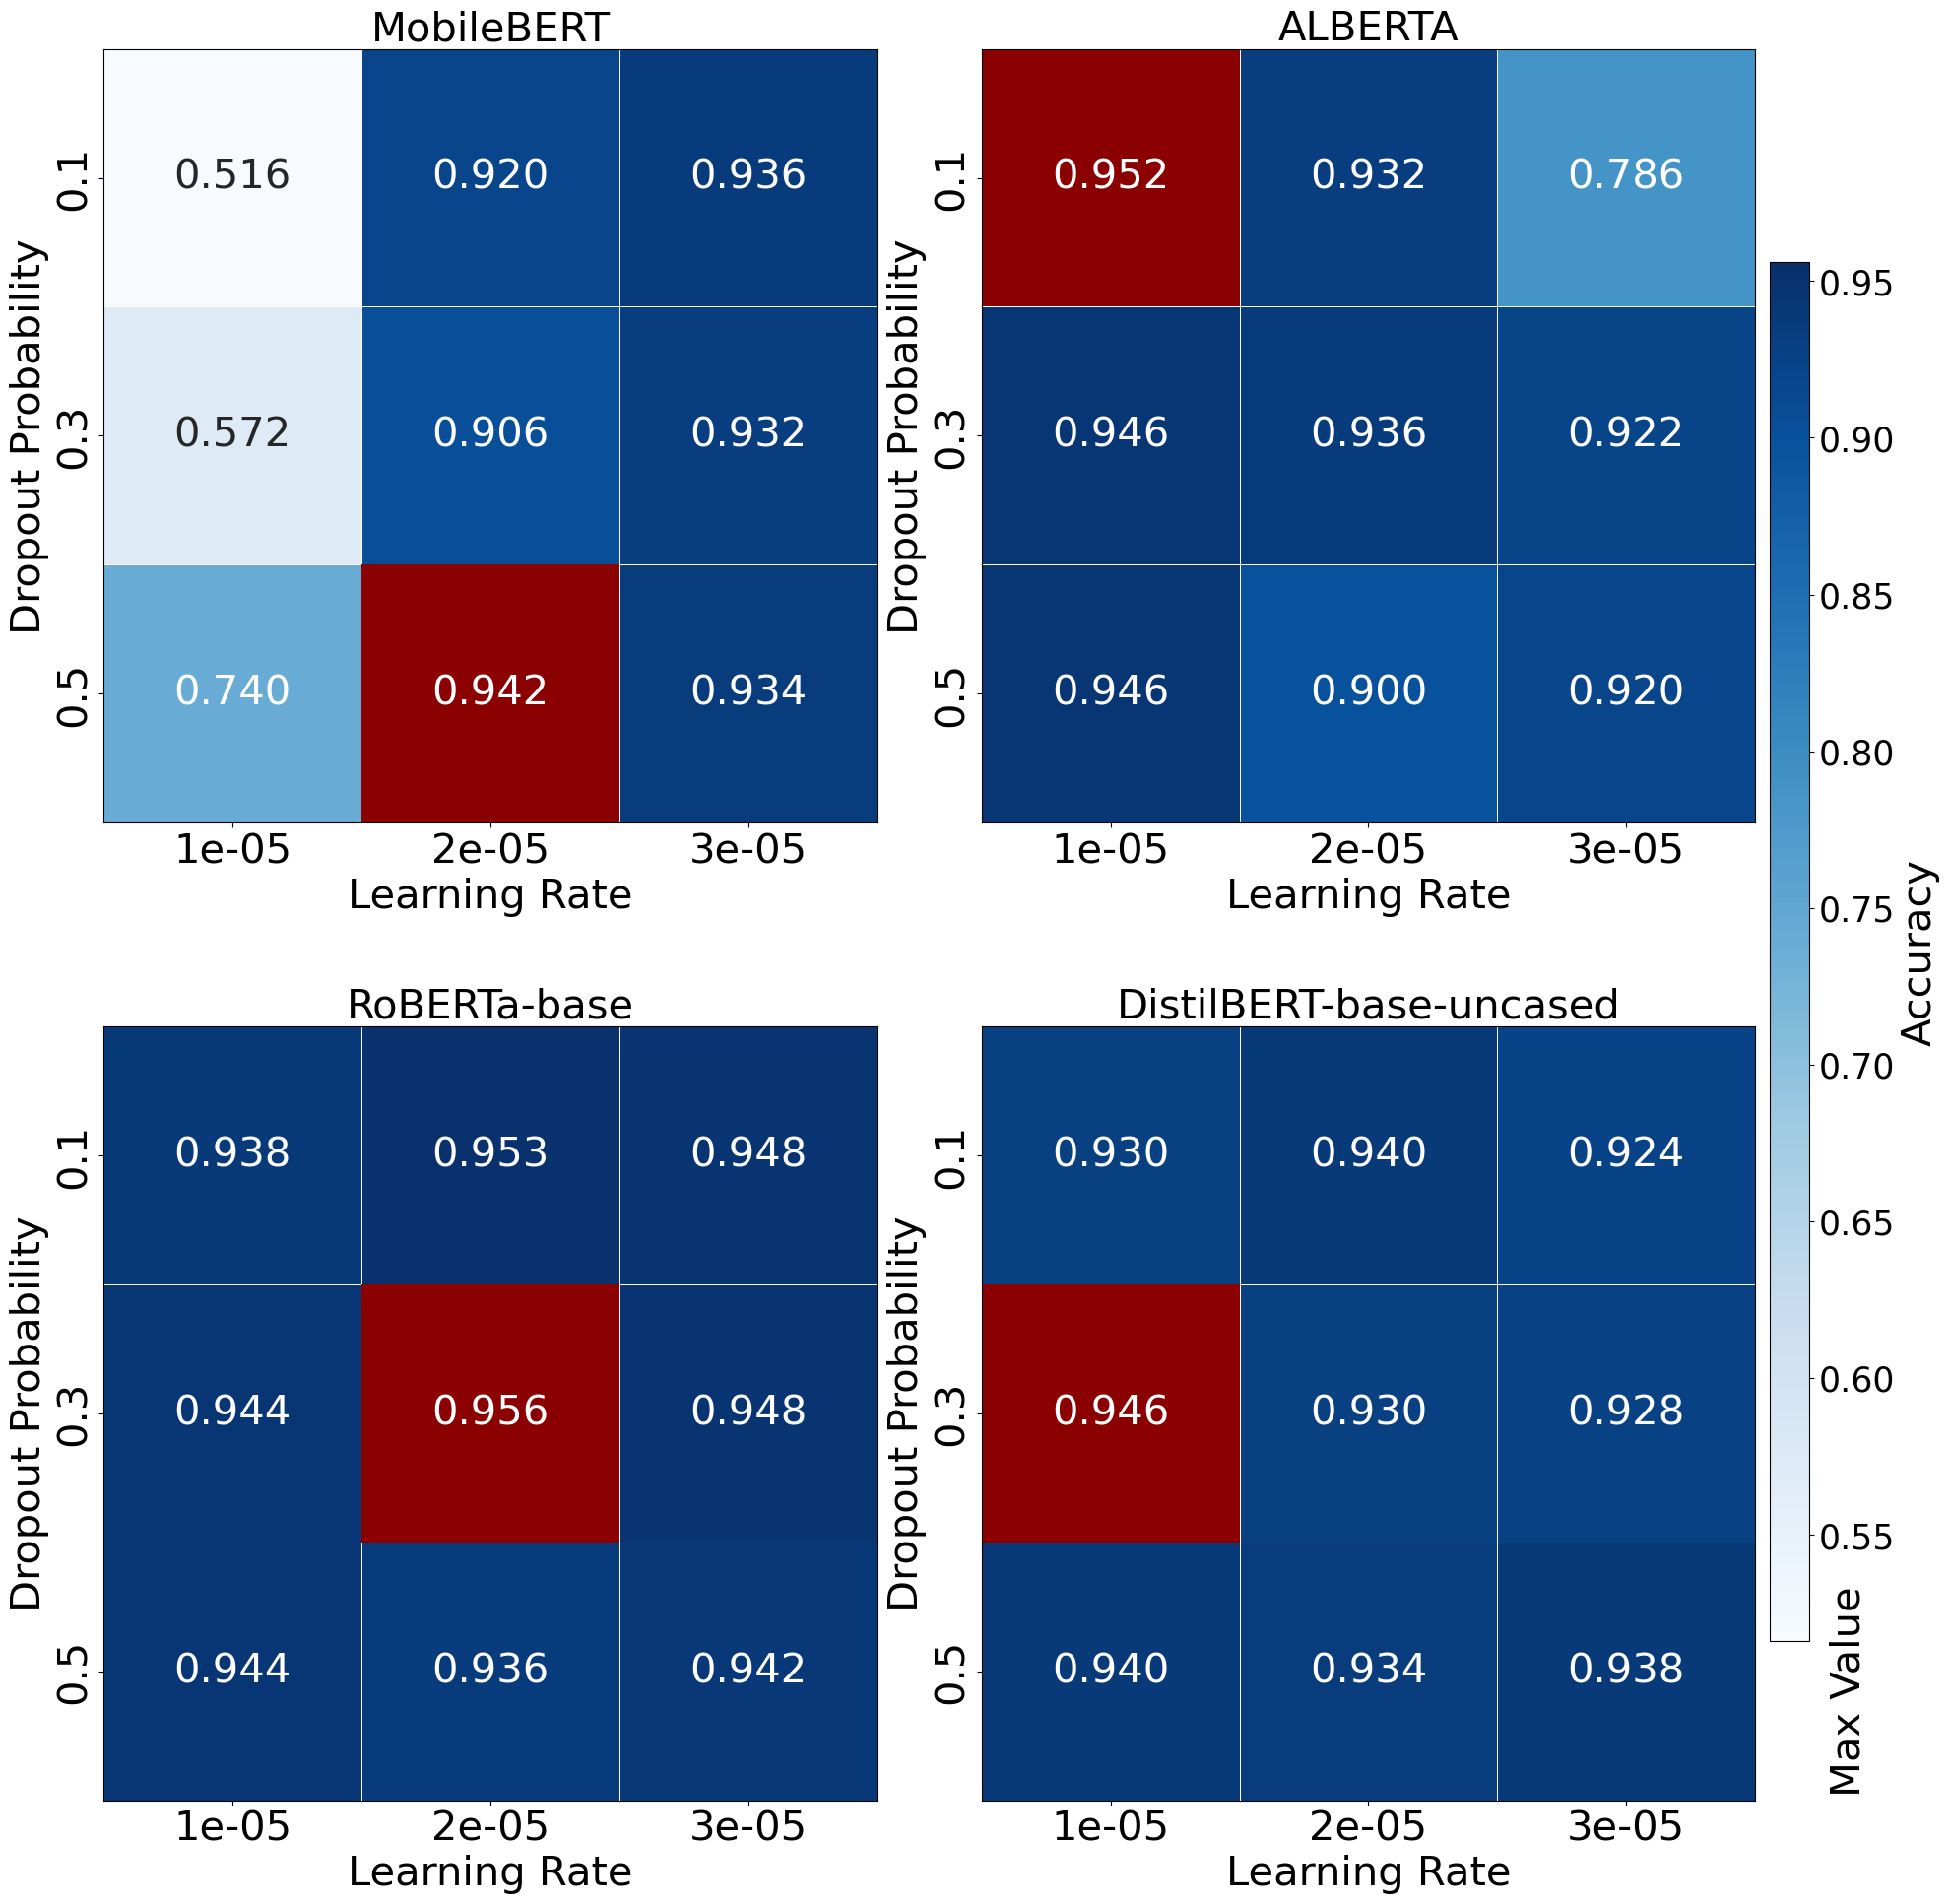

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Get the unique models
models = df['Model'].unique()

# Determine the number of rows and columns for the subplot grid
n_rows = 2
n_cols = 2

# Create a figure and axes with a size based on the number of models
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axes array
axs = axs.flatten()

# Get global minimum and maximum 'Test Accuracy'
vmin = df['Test Accuracy'].min()
vmax = df['Test Accuracy'].max()

# Create a colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])

# Create a custom color map for the legend
norm = Normalize(vmin=vmin, vmax=vmax)

# Loop over each model
for i, model in enumerate(models):
    # Filter the data for the current model
    df_model = df[df['Model'] == model]

    # Pivot the data to get it in the right format for the heatmap
    pivot = df_model.pivot(index='Dropout Probability', columns='Learning Rate', values='Test Accuracy')

    # Create a mask for the highest value
    mask = pivot == pivot.max().max()

    # Create the heatmap on the current axes
    sns.heatmap(pivot, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues', ax=axs[i], cbar=i==0, vmin=vmin, vmax=vmax, cbar_ax=cbar_ax if i==0 else None, cbar_kws={'label': 'Test Accuracy'}, annot_kws={'size': 15})  # Increase annotation text size

    # Add the mask with a different color
    sns.heatmap(pivot, cmap=['darkred'], cbar=False, mask=~mask, ax=axs[i])

    # Add the annotations on the red tiles with increased font size
    for text in axs[i].texts:
        text.set_fontsize(30)  # Increase font size
        if text.get_text() == str(pivot.max().max()):
            text.set_color('white')

    axs[i].set_title(f'{model}', fontsize=30)

    # Set font size for x and y ticks
    axs[i].tick_params(axis='x', labelsize=30)
    axs[i].tick_params(axis='y', labelsize=30)

    # Set font size for x and y labels
    axs[i].set_xlabel('Learning Rate', fontsize=30)
    axs[i].set_ylabel('Dropout Probability', fontsize=30)

    # Add a border around the heatmap
    for _, spine in axs[i].spines.items():
        spine.set_visible(True)

# Create color key (legend)
cbar = ColorbarBase(cbar_ax, cmap=plt.cm.Blues, norm=norm, orientation='vertical')
cbar.set_label('Accuracy', fontsize=30)

# Add a custom label to indicate the red color represents the maximum value
cbar_ax.text(1.5, 0.5, 'Max Value', rotation=90, va='center', ha='left', fontsize=30)

# Increase font size for color bar labels
cbar_ax.tick_params(labelsize=25)

# Increase font size for overall title
#fig.suptitle('Test Accuracy Heatmaps for Different Models', fontsize=30)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('../images/results.png')
plt.show()


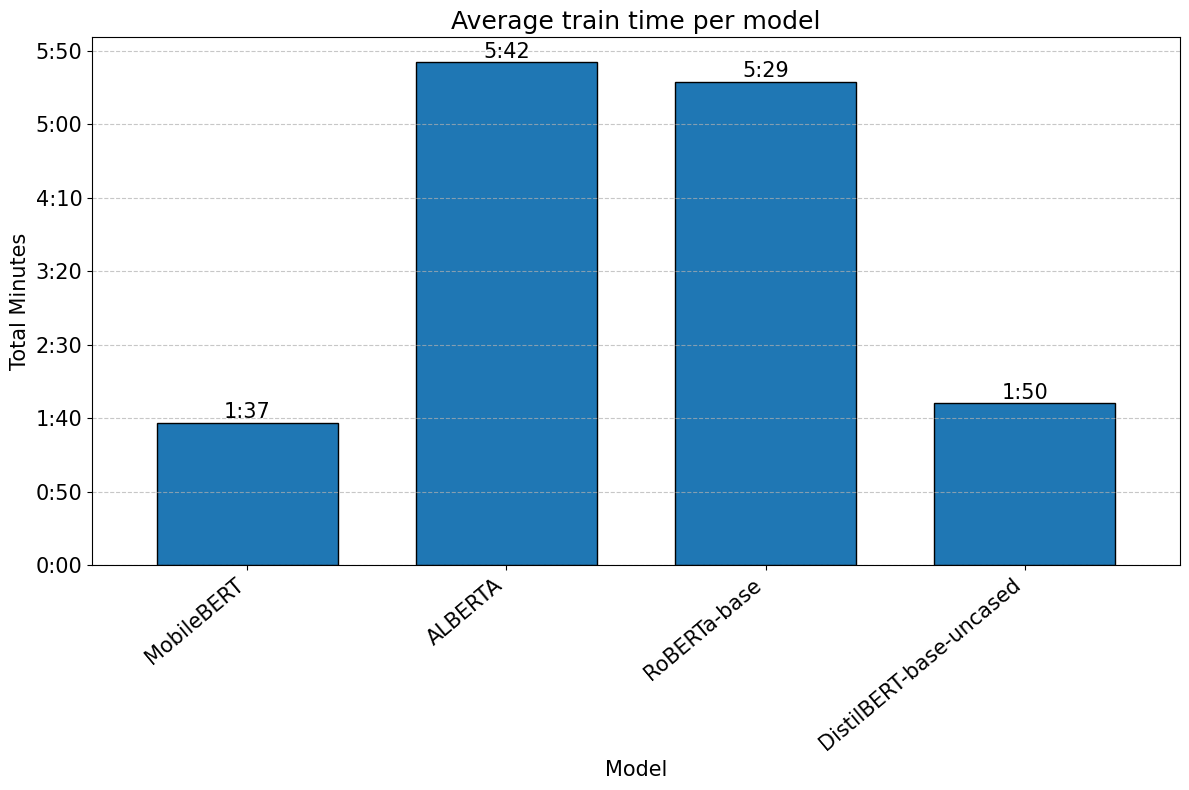

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assume 'time' is your DataFrame containing data
# time = ...

# Convert 'time_labels' back to total minutes
time['total_minutes'] = time['hours'] * 60 + time['minutes']

# Set a larger figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar chart
bar_width = 0.7
time.plot.bar(x='Model', y='total_minutes', ax=ax, width=bar_width, edgecolor='black')  # Adjust width and edgecolor
plt.title('Average train time per model', fontsize=18)  # Increase title font size
plt.xticks(rotation=40, ha='right', fontsize=15)  # Adjust rotation and alignment of x-axis labels

# Format y-axis labels to HH:MM
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x // 60)}:{int(x % 60):02d}'))

# Adding labels with increased font size
for p in ax.patches:
    ax.annotate(f'{int(p.get_height() // 60)}:{int(p.get_height() % 60):02d}', 
                (p.get_x() + p.get_width() / 2., p.get_height()+3), ha='center', fontsize=15)  # Adjust horizontal alignment and font size

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Increase axis label size
plt.xlabel('Model', fontsize=15)
plt.ylabel('Total Minutes', fontsize=15)

# Increase y-axis tick label size
plt.yticks(fontsize=15)

# Adjust layout to prevent cutting off the bottom
plt.tight_layout()

# Remove legend
plt.legend().remove()

# Save the figure with a higher resolution
plt.savefig('../images/average_train_time.png', dpi=300)

# Show the plot
plt.show()
